In [330]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

# Pre-processing:  Feature selection/extraction

In [331]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [332]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] =pd.to_datetime(df['due_date'])

In [333]:
df['loan_length'] =df['due_date'] - df['effective_date']
df['loan_length'] = df['loan_length'].dt.days
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_length
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29


In [334]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace= True)
# df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'],value=[0,1],inplace= True)
x = df[['Principal','terms','age','Gender','loan_length']]
y = df[['loan_status']].values.ravel()
x = pd.concat([x,pd.get_dummies(df['education'])], axis=1)
x.head()


,Principal,terms,age,Gender,loan_length,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,29,0,1,0,0
1,1000,30,33,1,29,1,0,0,0
2,1000,15,27,0,14,0,0,0,1
3,1000,30,28,1,29,0,0,0,1
4,1000,30,29,0,29,0,0,0,1


In [335]:
x = StandardScaler().fit(x).transform(x)

In [336]:
df_test =pd.read_csv('loan_test.csv')
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['due_date'] =pd.to_datetime(df_test['due_date'])
df_test['loan_length'] =df_test['due_date'] - df_test['effective_date']
df_test['loan_length'] = df_test['loan_length'].dt.days
df_test['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace= True)
x_test = df_test[['Principal','terms','age','Gender','loan_length']]
y_test = df_test[['loan_status']].values.ravel()
x_test = pd.concat([x_test,pd.get_dummies(df_test['education'])], axis=1)
x_test = StandardScaler().fit(x_test).transform(x_test)
print(x_test.shape)
print(y_test.shape)
print(x.shape)
print(y.shape)

(54, 9)
(54,)
(346, 9)
(346,)


# K Nearest Neighbor(KNN)

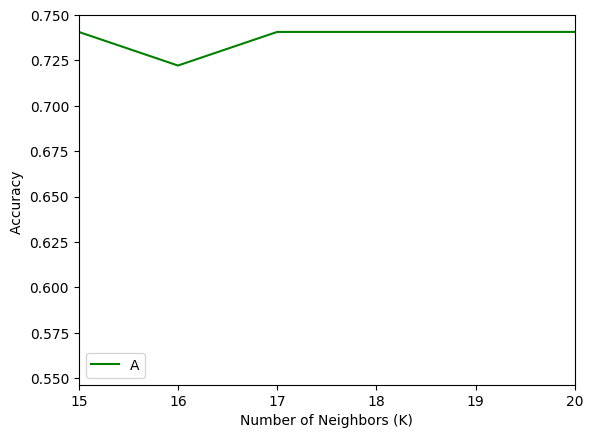

In [337]:
from sklearn.neighbors import KNeighborsClassifier
k = 30
acc = np.zeros((k-1))

for i in range(1,k):
    neigh = KNeighborsClassifier(i)
    neigh.fit(x,y)
    t = metrics.accuracy_score(y_test,neigh.predict(x_test))
    acc[i-1] = t
plt.plot(range(1,k),acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xlim([15,20])
plt.show()

In [338]:
knn = KNeighborsClassifier(17)
knn.fit(x,y)
knn_predict = knn.predict(x_test)
acc_test = metrics.accuracy_score(y_test,knn_predict)
acc = metrics.accuracy_score(y,knn.predict(x))

print("Train accuracy: ", acc)
print("Test accuracy: ", acc_test)

Train accuracy:  0.7514450867052023
Test accuracy:  0.7407407407407407


# Decision Tree


In [339]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x,y)
tree_predict = tree.predict(x_test)
acc_test2 = metrics.accuracy_score(y_test,tree_predict)
acc2 = metrics.accuracy_score(y,tree.predict(x))

print("Train accuracy: ", acc2)
print("Test accuracy: ", acc_test2)

Train accuracy:  0.8583815028901735
Test accuracy:  0.6296296296296297


# Support Vector Machine


In [340]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x,y)
svm_predict =svm.predict(x_test)
acc_test3 = metrics.accuracy_score(y_test,svm_predict)
acc3 = metrics.accuracy_score(y,svm.predict(x))
print("Train accuracy: ", acc3)
print("Test accuracy: ", acc_test3)

Train accuracy:  0.7543352601156069
Test accuracy:  0.7407407407407407


# Logistic Regression

In [341]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x,y)
lg_predict =lg.predict(x_test)
lg_proba = lg.predict_proba(x_test)[:,1]
acc_test4 = metrics.accuracy_score(y_test,lg_predict)
acc4 = metrics.accuracy_score(y,lg.predict(x))
print("Train accuracy: ", acc4)
print("Test accuracy: ", acc_test4)


Train accuracy:  0.7514450867052023
Test accuracy:  0.7407407407407407


# Model Evaluation

In [342]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

## Jaccard Score

In [343]:
knn_jc = jaccard_score(y_test,knn_predict,pos_label= 'PAIDOFF')
tree_jc = jaccard_score(y_test,tree_predict,pos_label='PAIDOFF')
svm_jc = jaccard_score(y_test,svm_predict,pos_label='PAIDOFF')
lg_jc = jaccard_score(y_test,lg_predict,pos_label='PAIDOFF')
print("KNN :",knn_jc)
print("Decision Tree :",tree_jc)
print("SVM :",svm_jc)
print("Logistic Regression :",lg_jc)

KNN : 0.7407407407407407
Decision Tree : 0.6
SVM : 0.7407407407407407
Logistic Regression : 0.7407407407407407


# F1-Score

In [344]:
knn_f1 = f1_score(y_test,knn_predict,pos_label= 'PAIDOFF')
tree_f1 = f1_score(y_test,tree_predict,pos_label='PAIDOFF')
svm_f1 = f1_score(y_test,svm_predict,pos_label='PAIDOFF')
lg_f1 = f1_score(y_test,lg_predict,pos_label='PAIDOFF')
print("KNN :",knn_f1)
print("Decision Tree :",tree_f1)
print("SVM :",svm_f1)
print("Logistic Regression :",lg_f1)

KNN : 0.851063829787234
Decision Tree : 0.75
SVM : 0.851063829787234
Logistic Regression : 0.851063829787234


# LogLoss

In [345]:
y2_test = y_test
for i in range(len(y2_test)):
    if y2_test[i] == "PAIDOFF":
        y2_test[i] = 1.0
    elif y2_test[i] == "COLLECTION":
        y2_test[i] = 0.0
y2_test = y2_test.astype('float')
lg_proba = lg_proba.astype('float')
print("Test: ",y2_test)
print("Probability: ",lg_proba)
logloss = log_loss(y2_test,lg_proba)
print("Log Loss: ",logloss)


Test:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Probability:  [0.84122872 0.74144101 0.84250171 0.71452841 0.75323893 0.77899205
 0.77388647 0.67912434 0.88798448 0.79446497 0.75845757 0.84935104
 0.67708151 0.85441004 0.83490657 0.57105247 0.77677755 0.88157526
 0.75031573 0.78671557 0.72210264 0.78355801 0.74501304 0.64114487
 0.73598875 0.73083444 0.73687438 0.75113153 0.68116033 0.56185928
 0.7202207  0.76743515 0.56185928 0.72210264 0.76743515 0.7202207
 0.68727045 0.78307752 0.83619252 0.84607016 0.6972387  0.86947001
 0.81032911 0.72210264 0.87126041 0.67095746 0.67958694 0.81744675
 0.78936912 0.69525945 0.79246436 0.70508233 0.77843118 0.6972387 ]
Log Loss:  0.5942213831198252


# Report
| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.7407  | 0.8511   | NA      |
| Decision Tree      | 0.6     | 0.75     | NA      |
| SVM                | 0.7407  | 0.8511   | NA      |
| LogisticRegression | 0.7407  | 0.8511   | 0.5942  |